In [1]:
import pandas as pd
import numpy as np
import sklearn

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

import utils
import neuralNetMLP
import importlib
importlib.reload(utils)
importlib.reload(neuralNetMLP)

<module 'neuralNetMLP' from 'C:\\BGU\\lior\\T3\\Assignment3\\Part_1\\neuralNetMLP.py'>

In [2]:
### Loading Data
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X = X.values
X = ((X / 255.) - .5) * 2
y = y.astype(int).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123, stratify=y)

In [3]:
### One layer model taken from  “Implementing a Multi-layer Artificial Neural Network from Scratch” of the book “Machine Learning with PyTorch and Scikit-Learn” by Raschka et al. (2022)
print('One Layer Model')

model = neuralNetMLP.NeuralNetMLP(
    num_features=28*28,
    num_hidden_l1=50,    
    num_hidden_l2=0,
    num_classes=10,
    num_layers=1
)

epoch_loss, epoch_train_acc, epoch_valid_acc = model.train(
    X_train=X_train, y_train=y_train, X_valid=X_test, y_valid=y_test,
    num_epochs=50,
    learning_rate=0.1
)


One Layer Model
Epoch: 001/050 | Train MSE: 0.05 | Train Acc: 74.65% | Valid Acc: 74.37%
Epoch: 002/050 | Train MSE: 0.03 | Train Acc: 84.65% | Valid Acc: 84.65%
Epoch: 003/050 | Train MSE: 0.03 | Train Acc: 87.32% | Valid Acc: 87.20%
Epoch: 004/050 | Train MSE: 0.02 | Train Acc: 88.79% | Valid Acc: 88.70%
Epoch: 005/050 | Train MSE: 0.02 | Train Acc: 89.69% | Valid Acc: 89.56%
Epoch: 006/050 | Train MSE: 0.02 | Train Acc: 90.36% | Valid Acc: 90.17%
Epoch: 007/050 | Train MSE: 0.02 | Train Acc: 90.75% | Valid Acc: 90.64%
Epoch: 008/050 | Train MSE: 0.02 | Train Acc: 91.22% | Valid Acc: 91.18%
Epoch: 009/050 | Train MSE: 0.02 | Train Acc: 91.38% | Valid Acc: 91.24%
Epoch: 010/050 | Train MSE: 0.01 | Train Acc: 91.73% | Valid Acc: 91.55%
Epoch: 011/050 | Train MSE: 0.01 | Train Acc: 92.02% | Valid Acc: 91.81%
Epoch: 012/050 | Train MSE: 0.01 | Train Acc: 92.17% | Valid Acc: 91.90%
Epoch: 013/050 | Train MSE: 0.01 | Train Acc: 92.46% | Valid Acc: 92.15%
Epoch: 014/050 | Train MSE: 0.01 | 

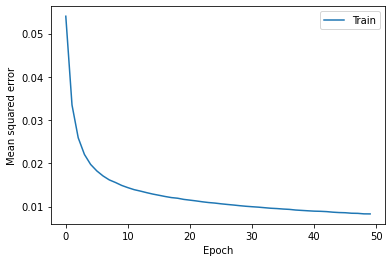

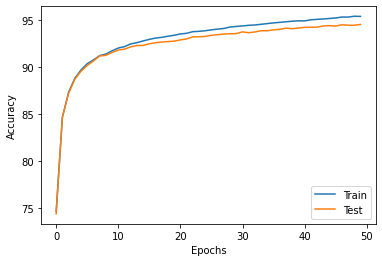

Test accuracy: 94.53%


In [4]:
utils.print_results_charts(model=model,X_test=X_test,y_test=y_test,epoch_loss=epoch_loss,epoch_train_acc= epoch_train_acc,epoch_valid_acc=epoch_valid_acc)

In [5]:
ret_proba = model.predict(X_test,ret_proba=True)
one_layer_df = pd.DataFrame(ret_proba, columns = [f'prob_digit_{digit}' for digit in range(10)])
one_layer_df['label'] = np.array(y_test)
one_layer_df.to_csv('results/one_layer.csv', index=False)

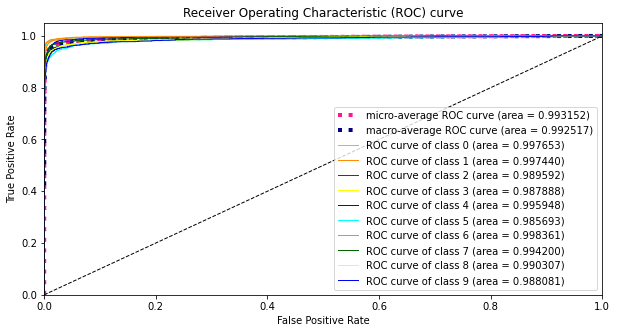

In [6]:
utils.plot_roc_curve(y_test,ret_proba)

In [7]:
### Two layer model based on the prevoius implementation
print('Two Layers Model')

model = neuralNetMLP.NeuralNetMLP(
    num_features=28*28,
    num_hidden_l1=75,
    num_hidden_l2=50,
    num_classes=10,
    num_layers=2
)

epoch_loss, epoch_train_acc, epoch_valid_acc = model.train(
    X_train=X_train, y_train=y_train, X_valid=X_test, y_valid=y_test,
    num_epochs=50,
    learning_rate=0.1
)


Two Layers Model
Epoch: 001/050 | Train MSE: 0.09 | Train Acc: 17.63% | Valid Acc: 17.57%
Epoch: 002/050 | Train MSE: 0.08 | Train Acc: 25.49% | Valid Acc: 25.50%
Epoch: 003/050 | Train MSE: 0.07 | Train Acc: 52.51% | Valid Acc: 52.44%
Epoch: 004/050 | Train MSE: 0.06 | Train Acc: 63.35% | Valid Acc: 63.60%
Epoch: 005/050 | Train MSE: 0.05 | Train Acc: 75.37% | Valid Acc: 75.49%
Epoch: 006/050 | Train MSE: 0.04 | Train Acc: 83.07% | Valid Acc: 83.03%
Epoch: 007/050 | Train MSE: 0.03 | Train Acc: 85.53% | Valid Acc: 85.42%
Epoch: 008/050 | Train MSE: 0.03 | Train Acc: 86.94% | Valid Acc: 86.82%
Epoch: 009/050 | Train MSE: 0.02 | Train Acc: 88.32% | Valid Acc: 88.11%
Epoch: 010/050 | Train MSE: 0.02 | Train Acc: 89.33% | Valid Acc: 89.06%
Epoch: 011/050 | Train MSE: 0.02 | Train Acc: 90.00% | Valid Acc: 89.67%
Epoch: 012/050 | Train MSE: 0.02 | Train Acc: 90.41% | Valid Acc: 90.13%
Epoch: 013/050 | Train MSE: 0.02 | Train Acc: 90.73% | Valid Acc: 90.47%
Epoch: 014/050 | Train MSE: 0.02 |

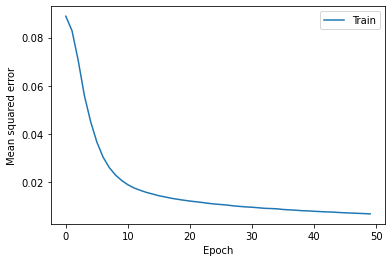

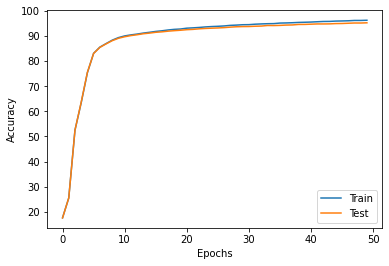

Test accuracy: 95.22%


In [8]:
utils.print_results_charts(model=model,X_test=X_test,y_test=y_test,epoch_loss=epoch_loss,epoch_train_acc= epoch_train_acc,epoch_valid_acc=epoch_valid_acc)

In [9]:
ret_proba = model.predict(X_test,ret_proba=True)
two_layers_df = pd.DataFrame(ret_proba, columns = [f'prob_digit_{digit}' for digit in range(10)])
two_layers_df['label'] = np.array(y_test)
two_layers_df.to_csv('results/two_layers.csv', index=False)

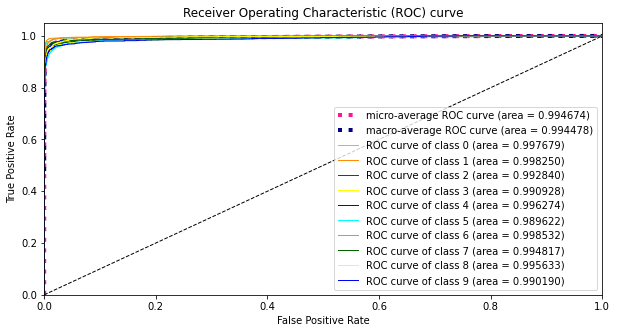

In [10]:
utils.plot_roc_curve(y_test,ret_proba)

In [ ]:
# Third implementaion based on keras
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Build the model.
model = Sequential([
  Dense(64, activation='relu', input_shape=(784,)),
  Dense(64, activation='relu'),
  Dense(64, activation='relu'),
  Dense(10, activation='softmax'),
])

# Compile the model.
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

# Train the model.
history = model.fit(
    X_train,
    to_categorical(y_train),
    epochs=50,
    batch_size=32,
    validation_split=0.2
)

model_history = pd.DataFrame(history.history)
model_history['epoch'] = history.epoch


# Evaluate the model.
model_eval = model.evaluate(
  X_test,
  to_categorical(y_test)
)

Epoch 1/50
1225/1225 [==============================] - 3s 2ms/step - loss: 0.3986 - accuracy: 0.8761 - val_loss: 0.2723 - val_accuracy: 0.9191
Epoch 2/50
1225/1225 [==============================] - 2s 2ms/step - loss: 0.2076 - accuracy: 0.9358 - val_loss: 0.2668 - val_accuracy: 0.9184
Epoch 3/50
1225/1225 [==============================] - 2s 2ms/step - loss: 0.1688 - accuracy: 0.9473 - val_loss: 0.1507 - val_accuracy: 0.9552
Epoch 4/50
1225/1225 [==============================] - 2s 2ms/step - loss: 0.1443 - accuracy: 0.9553 - val_loss: 0.1635 - val_accuracy: 0.9527
Epoch 5/50
1225/1225 [==============================] - 2s 2ms/step - loss: 0.1261 - accuracy: 0.9606 - val_loss: 0.1429 - val_accuracy: 0.9573
Epoch 6/50
1225/1225 [==============================] - 2s 2ms/step - loss: 0.1138 - accuracy: 0.9649 - val_loss: 0.1504 - val_accuracy: 0.9558
Epoch 7/50
1225/1225 [==============================] - 2s 2ms/step - loss: 0.1032 - accuracy: 0.9674 - val_loss: 0.1351 - val_accuracy:

In [ ]:
model_eval

In [ ]:
utils.print_results_charts(model=model,
                           X_test=X_test,
                           y_test=y_test,
                           epoch_loss=model_history['loss'],
                           epoch_train_acc= model_history['accuracy'],
                           epoch_valid_acc=model_history['val_accuracy'])

In [ ]:
ret_proba = model.predict(X_test)
keras_df = pd.DataFrame(ret_proba, columns = [f'prob_digit_{digit}' for digit in range(10)])
keras_df['label'] = np.array(y_test)
keras_df.to_csv('results/keras.csv', index=False)

In [ ]:
utils.plot_roc_curve(y_test,ret_proba)